![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

# Exercises
## The Sakila Database

One of the best example databases out there is the <a href="https://dev.mysql.com/doc/sakila/en/">Sakila Database</a>, which was originally created by MySQL and has been open sourced under the terms of the BSD License.

The Sakila database is a nicely normalised schema modelling a DVD rental store, featuring things like films, actors, film-actor relationships, and a central inventory table that connects films, stores, and rentals.

<img width="1200px" src="https://user-images.githubusercontent.com/7065401/58504872-fa243b00-8161-11e9-85ed-4b7d8d7ce9f7.png" />

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [1]:
!pip install numpy scipy pandas matplotlib seaborn

     |████████████████████████████████| 15.3 MB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 27.4 MB 26.8 MB/s eta 0:00:01
     |████████████████████████████████| 9.9 MB 34.5 MB/s eta 0:00:01
     |████████████████████████████████| 11.5 MB 44.8 MB/s eta 0:00:01
     |████████████████████████████████| 285 kB 37.3 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 53.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 25.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 41.0 MB/s eta 0:00:01


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

In [3]:
conn = sqlite3.connect('data/sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

In [4]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [5]:
df.shape

(16044, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB


In [7]:
df.describe()

,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044.000000,16044.00000,16044.000000,16044.000000
mean,1.506171,4.93549,2.942630,20.215443
std,0.499978,1.40169,1.649678,6.081771
min,1.000000,3.00000,0.990000,9.990000
25%,1.000000,4.00000,0.990000,14.990000
50%,2.000000,5.00000,2.990000,20.990000
75%,2.000000,6.00000,4.990000,25.990000
max,2.000000,7.00000,4.990000,29.990000


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `film_rental_duration`?

In [8]:
# your code goes here
df['film_rental_duration'].mean()

4.935489902767389

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the most common rental duration?

Show a <b>bar plot</b> with all the durations.

<AxesSubplot:>

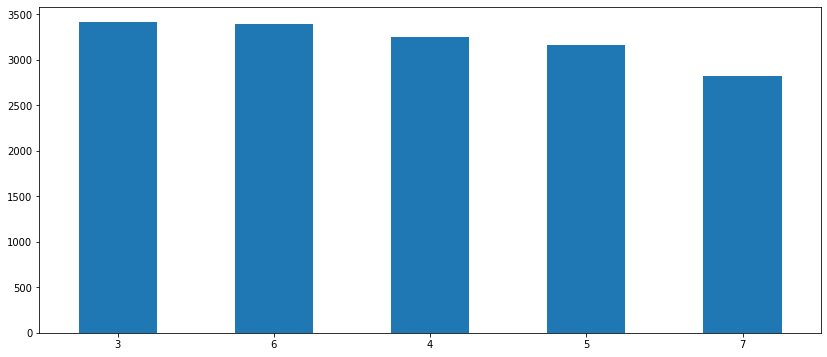

In [11]:
# your code goes here
df['film_rental_duration'].value_counts().plot(kind='bar', figsize=(14,6), rot=0)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the most common rental rate?

- Show a <b>pie plot</b> with all possible rental rates.
- Show a <b>bar plot</b> with all possible rental rates.
- Which plot you think fits the best in this case? Why?

<AxesSubplot:ylabel='film_rental_rate'>

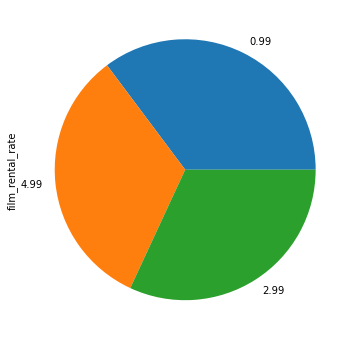

In [12]:
# your code goes here
df['film_rental_rate'].value_counts().plot(kind='pie', figsize=(6,6))

<AxesSubplot:>

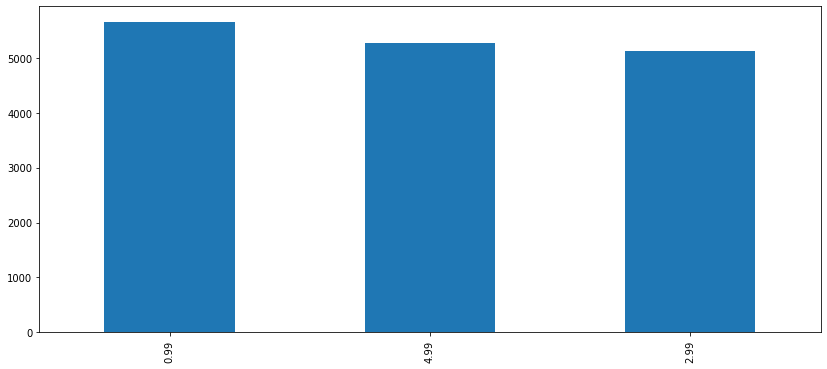

In [13]:
# your code goes here
df['film_rental_rate'].value_counts().plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How is the replacement cost distributed?

- Show a <b>box plot</b> of the replacement costs.
- Show a <b>density plot</b> of the replacement costs.
- Add a red line on the <b>mean</b>.
- Add a green line on the median <b>median</b>.

<AxesSubplot:>

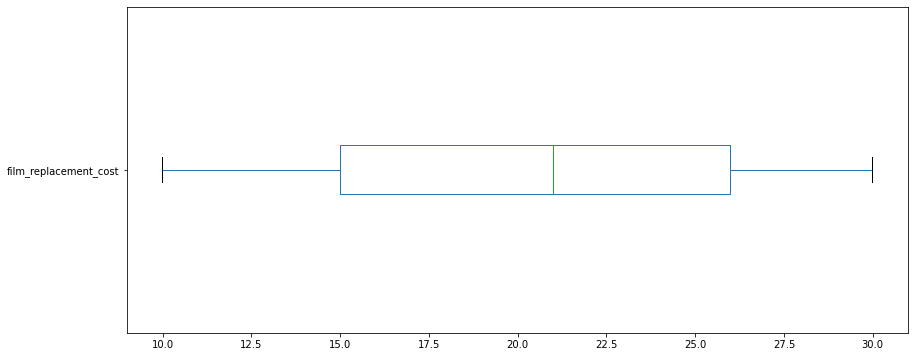

In [17]:
# your code goes here
df['film_replacement_cost'].plot(kind='box', vert=False, figsize=(14,6))

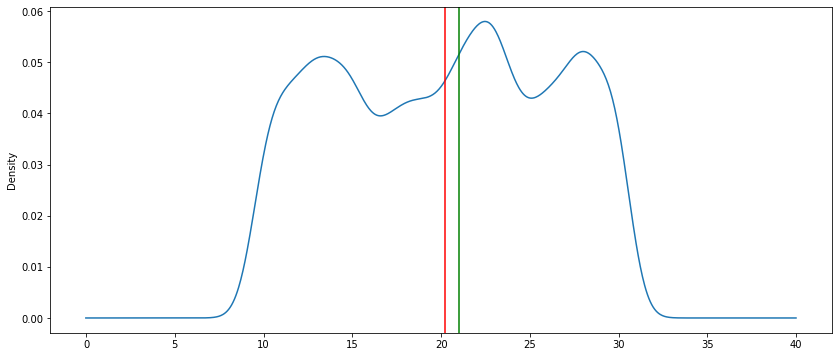

In [26]:
# your code goes here
ax = df['film_replacement_cost'].plot(kind='density', figsize=(14,6))
ax.axvline(df['film_replacement_cost'].mean(), color='red')
ax.axvline(df['film_replacement_cost'].median(), color='green')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many films of each rating do we have?

- Show the raw count of each film rating.
- Show a <b>bar plot</b> with all possible film ratings.

In [30]:
# your code goes here
df['film_rating'].value_counts()

PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: film_rating, dtype: int64

<AxesSubplot:>

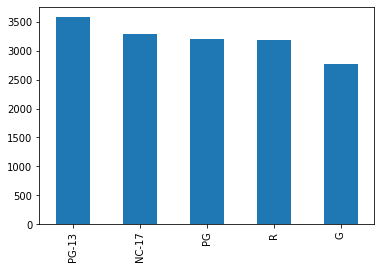

In [31]:
# your code goes here
df['film_rating'].value_counts().plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Does the film replacement cost vary depending on film rating?

In the United States, film classification is a voluntary process with the ratings issued by the Motion Picture Association of America (MPAA) via the Classification and Rating Administration (CARA).

- G (General Audiences): All Ages are Admitted.
- PG (Parental Guidance Suggested): Some Material May Not Be Suitable for Children.
- PG-13 (Parents Strongly Cautioned): Some Material May Be Inappropriate for Children Under 13.
- R (Restricted): Under 17 Requires Accompanying Parent or Adult Guardian.
- NC-17 (Adults Only): No One 17 and Under Admitted.

Show a <b>grouped box plot</b> per film rating with the film replacement costs.

<AxesSubplot:title={'center':'film_replacement_cost'}, xlabel='[film_rating]'>

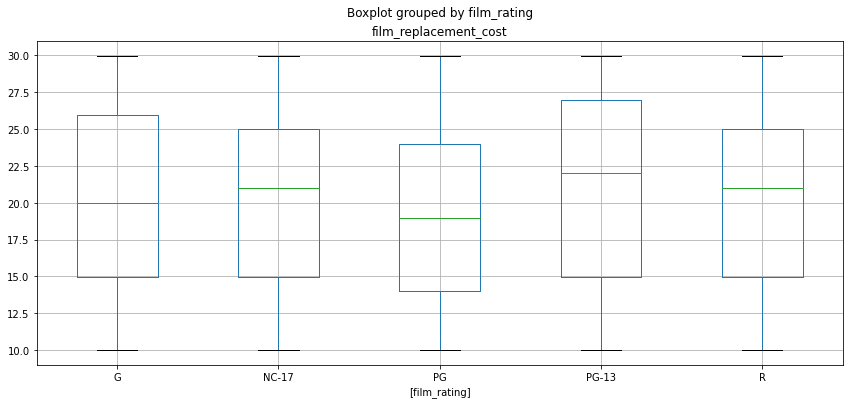

In [32]:
# your code goes here
df[['film_replacement_cost', 'film_rating']].boxplot(by='film_rating', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add and calculate a new `rental_days` column

This numeric column should have the count of days between `rental_date` and `return_date`.

In [36]:
# your code goes here
df['rental_days'] = df[['rental_date', 'return_date']].apply(lambda x: (x[1] - x[0]).days, axis=1)
df['rental_days'].head()

rental_id
1    1.0
2    3.0
3    7.0
4    9.0
5    8.0
Name: rental_days, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Analyze the distribution of `rental_days`

- Calculate the mean of `rental_days`.
- Show a <b>density (KDE)</b> of `rental_days`.

In [37]:
# your code goes here
df['rental_days'].mean()

4.525944139713763

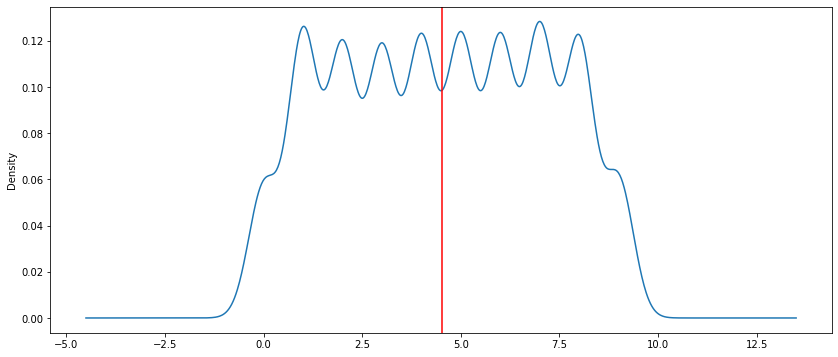

In [40]:
# your code goes here
ax = df['rental_days'].plot(kind='density', figsize=(14,6))
ax.axvline(df['rental_days'].mean(), color='red')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add and calculate a new `film_daily_rental_rate` column

This value should be the division of `film_rental_rate` by `film_rental_duration`.

In [42]:
# your code goes here
df['film_daily_rental_rate'] = df[['film_rental_rate', 'film_rental_duration']].apply(lambda x: x[0] / x[1], axis = 1)
df['film_daily_rental_rate'].head()

rental_id
1    0.427143
2    0.427143
3    0.427143
4    0.165000
5    0.598000
Name: film_daily_rental_rate, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Analyze the distribution of `film_daily_rental_rate`

- Calculate the mean of `film_daily_rental_rate`.
- Show a <b>density (KDE)</b> of `film_daily_rental_rate`.

In [43]:
# your code goes here
df['film_daily_rental_rate'].mean()

0.6458262471655329

In [ ]:
df['film_daily_rental_rate'].mean()

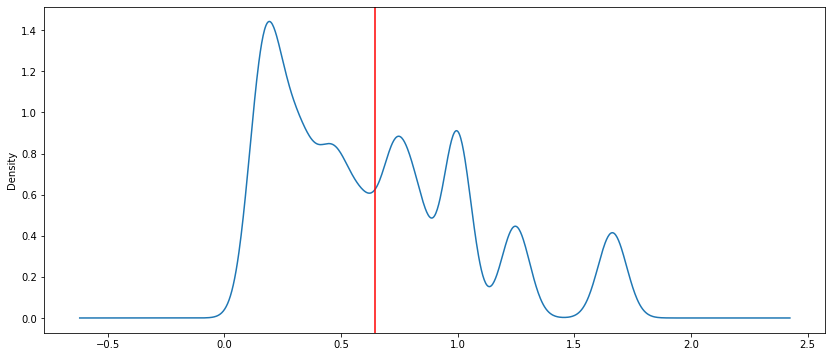

In [47]:
# your code goes here
ax = df['film_daily_rental_rate'].plot(kind='density', figsize=(14,6))
ax.axvline(df['film_daily_rental_rate'].mean(), color='red')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### List 10 films with the lowest daily rental rate

In [48]:
# your code goes here
df[['film_title','film_daily_rental_rate']].sort_values(by='film_daily_rental_rate', ascending=True).head(10)

,film_title,film_daily_rental_rate
rental_id,,
14877,DECEIVER BETRAYED,0.141429
5734,BORROWERS BEDAZZLED,0.141429
11899,PRIMARY GLASS,0.141429
4210,HOOK CHARIOTS,0.141429
7215,MOON BUNCH,0.141429
1268,SIEGE MADRE,0.141429
7229,DECEIVER BETRAYED,0.141429
7231,GILBERT PELICAN,0.141429
7235,EMPIRE MALKOVICH,0.141429


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### List 10 films with the highest daily rental rate

In [50]:
# your code goes here
df[['film_title','film_daily_rental_rate']].sort_values(by='film_daily_rental_rate', ascending=False).head(10)

,film_title,film_daily_rental_rate
rental_id,,
14763,FLINTSTONES HAPPINESS,1.663333
7055,VELVET TERMINATOR,1.663333
7014,CLERKS ANGELS,1.663333
1855,WIFE TURN,1.663333
11511,INNOCENT USUAL,1.663333
1849,MAIDEN HOME,1.663333
1844,KISSING DOLLS,1.663333
11503,FOOL MOCKINGBIRD,1.663333
1835,FLINTSTONES HAPPINESS,1.663333


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many rentals were made in Lethbridge city?

In [55]:
# your code goes here
df.loc[df['rental_store_city'] == 'Lethbridge'].shape[0]

7923

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many rentals of each film rating were made in Lethbridge city?

Show a <b>bar plot</b> with each film rating count.

In [58]:
# your code goes here
df.loc[df['rental_store_city'] == 'Lethbridge', 'film_rating'].value_counts()

PG-13    1849
NC-17    1625
R        1537
PG       1535
G        1377
Name: film_rating, dtype: int64

<AxesSubplot:>

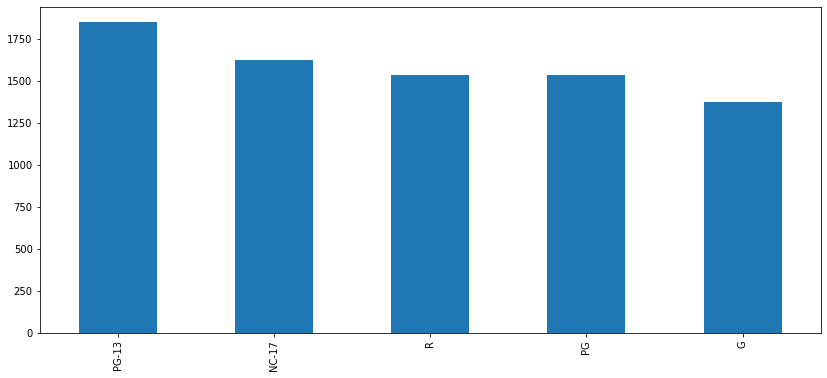

In [59]:
# your code goes here
df.loc[df['rental_store_city'] == 'Lethbridge', 'film_rating'].value_counts().plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many rentals were made in Woodridge city with rental duration higher than 5 days?

In [66]:
# your code goes here
df.loc[(df['rental_store_city'] == 'Woodridge') & (df['film_rental_duration'] > 5)].shape[0]

3186

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many rentals were made at the store with id 2 or with replacement cost lower than 10.99 USD?

In [68]:
# your code goes here
df.loc[(df['store_id'] == 2) | (df['film_replacement_cost'] < 10.99)].shape[0]


8444

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)